# This notebook scrapes current data from DAFT.IE on Properties for Rent 

### Scroll down through this code section to reach the report 1, showing average county rental rates

In [51]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd
import re

headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}

listOfPrices = []
xPlot = []
listOfAverages = []

count = 20
countWeeklyRents=0

pandaListOfCounties = []
pandaListOfPrices = []
listOfHouseTypes = []
listOfAddresses = []
listOfBeds=[]
listOfURLS=[]

def getAverage(listOfPrices):
	averagePrice = sum(listOfPrices) / float(len(listOfPrices))
	averagePrice = round(averagePrice)
	return averagePrice

listOfCounties = ['carlow', 'cavan', 'clare', 'cork', 'donegal', 'galway', 'kerry', 'kildare', 'kilkenny', 'laois', 'leitrim', 'limerick', 'louth', 'mayo', 'meath', 'offaly', 'roscommon', 'sligo', 'tipperary', 'waterford', 'westmeath', 'wexford', 'wicklow']


for place in listOfCounties:

	listOfPrices = []

	for i in range(0,1):	
		#https://www.daft.ie/property-for-rent/sligo/houses?adState=sale-agreed&sort=priceAsc&numBeds_from=3&numBeds_to=3&firstPublishDate_from=now-40d%2Fd
		url = 'https://www.daft.ie/property-for-rent/'+ place + '/?offset='
		#url = 'https://www.daft.ie/property-for-rent/'+ place + '?adState=sale-agreed&firstPublishDate_from=now-40d&offset='
		url = url + str(count)
		count = count + 20
		print("Importing Data....")
		response = requests.get(url, headers=headers)
		c = response.content
		soup = BeautifulSoup(c, features='html.parser')
		#print(soup)
		prices = soup.find_all('span', {'class':'TitleBlock__StyledSpan-sc-1avkvav-5 fKAzIL'})
		houseTypes = soup.find_all('p', {'class': 'TitleBlock__CardInfoItem-sc-1avkvav-9 cKZZql'})
		houseAddress = soup.find_all('p', {'class':'TitleBlock__Address-sc-1avkvav-8 dzihyY'})
		noBeds=soup.find_all('p',{'class': 'TitleBlock__CardInfoItem-sc-1avkvav-9 iLMdur', 'data-testid': 'beds'})
		#houseURL=soup.find_all('a',{'class': 'SearchPage__Result-gg133s-2 djuMQD'})
		#print(noBeds)
		#print(houseURL)
		for price, house, address, beds in zip(prices, houseTypes, houseAddress, noBeds):
			itemPrice = price.get_text()
			itemPrice = itemPrice.replace("€","")
			itemPrice = itemPrice.replace(",","")
			fullstring = itemPrice
			substring = "per week"
			substring2 = "per month"
			if substring in fullstring:
				itemPrice2=1000 #float(itemPrice.replace(" per week",""))*4.3
				countWeeklyRents=countWeeklyRents+1
			elif substring2 in fullstring:
				itemPrice = itemPrice.replace(" per month","")
				itemPrice2=float(itemPrice)
				itemPrice = float(itemPrice2)
				listOfPrices.append(itemPrice)
				print(itemPrice)               
				pandaListOfCounties.append(place)
				pandaListOfPrices.append(itemPrice)
				newHouse = house.get_text()
				newAddress = address.get_text()
				newBeds= beds.get_text()
				listOfHouseTypes.append(newHouse)
				listOfAddresses.append(newAddress)
				listOfBeds.append(newBeds)
			else:
				itemprice2=0
#			itemPrice = itemPrice.replace(" per week","")     
			#if(itemPrice.isdigit()):
			#newURL= URLS.get_text()
			#listOfURLS.append(newURL)
			#print(newAddress)
			#print(newHouse)
			#print(newBeds)
			#print(itemPrice)
			#print(newURL)            
		if(prices == []):
			break
		#print(listOfPrices)
		#print(url)
	averageStatement = 'The average price of a house in ' + place + ' is €' + str(getAverage(listOfPrices))
	averageHousePrice = getAverage(listOfPrices)
	listOfAverages.append(averageHousePrice)
	count = 0
print("Data Imported!!")

Importing Data....
825.0
1670.0
1100.0
1300.0
2000.0
2235.0
1753.0
Importing Data....
1200.0
650.0
1600.0
2000.0
600.0
795.0
Importing Data....
3000.0
3000.0
700.0
750.0
1500.0
1000.0
1200.0
850.0
975.0
750.0
1600.0
2000.0
1300.0
950.0
1450.0
800.0
Importing Data....
1325.0
1150.0
1450.0
1530.0
1860.0
2000.0
1650.0
2700.0
2400.0
2500.0
3000.0
Importing Data....
1250.0
750.0
1000.0
950.0
1200.0
750.0
800.0
850.0
1100.0
950.0
750.0
600.0
1100.0
1200.0
750.0
850.0
1100.0
850.0
850.0
Importing Data....
700.0
2250.0
900.0
1450.0
1150.0
695.0
2250.0
900.0
1350.0
2200.0
3000.0
2200.0
1600.0
950.0
3000.0
3500.0
1600.0
2100.0
Importing Data....
2900.0
900.0
1300.0
650.0
1150.0
1300.0
850.0
1500.0
1100.0
1500.0
1750.0
1400.0
1100.0
1250.0
2500.0
2450.0
Importing Data....
1800.0
2500.0
1400.0
900.0
900.0
1200.0
1850.0
1400.0
1976.0
1500.0
1400.0
2000.0
1350.0
850.0
2750.0
2300.0
2800.0
1375.0
Importing Data....
650.0
1000.0
1200.0
2500.0
1350.0
Importing Data....
1300.0
2500.0
1000.0
Importing Da

In [52]:
house_details = {
	'county':pandaListOfCounties,
	'price':pandaListOfPrices,
	'house_type':listOfHouseTypes,
	'house_address':listOfAddresses,
	'beds':listOfBeds
}
print(countWeeklyRents)
print(listOfAverages)

29
[1555, 1141, 1364, 1960, 929, 1766, 1475, 1681, 1340, 1600, 828, 1526, 1326, 1004, 1539, 1264, 1141, 977, 1050, 1432, 1243, 1283, 2090]


## 1. Table of Average Rental Prices x County (excluding Dublin)

In [53]:
df = pd.DataFrame(house_details) 
dfAvgs=pd.DataFrame(data=listOfAverages,index=listOfCounties) 
dfAvgs=dfAvgs.sort_values(by=[0], ascending=False) 
display(dfAvgs)

,0
wicklow,2090
cork,1960
galway,1766
kildare,1681
laois,1600
carlow,1555
meath,1539
limerick,1526
kerry,1475
waterford,1432


## 2. Chart of Average Rents x County (excluding Dublin)

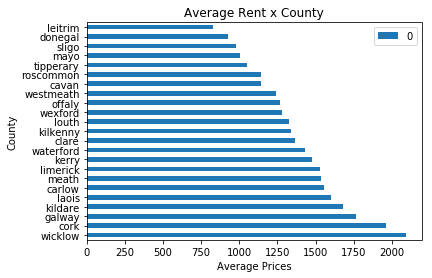

In [54]:
#plt.bar(range(len(data)), sorted(data), color='red', alpha=0.5)
#plt.barh(listOfCounties, listOfAverages)
dfAvgs.plot(kind='barh')
plt.ylabel('County')
plt.title('Average Rent x County')
plt.xlabel('Average Prices')
plt.legend()
plt.show()

## 3. 3-Bedroom Houses in Sligo Mayo Roscommon Leitrim Cavan Donegal

In [55]:
dfhouse=df.query('house_type == "House" and beds=="3 Bed"and price>100 and (county=="sligo" or county=="mayo"or county=="roscommon"or county=="leitrim"or county=="cavan"or county=="donegal")')
display(dfhouse)
print("Count")
print(dfhouse['price'].count())
print("Average")
print(dfhouse['price'].mean())
print("Median")
print(dfhouse['price'].median())

,beds,county,house_address,house_type,price
7,3 Bed,cavan,"Ballinagh1, Ballinagh, Co. Cavan",House,1200.0
10,3 Bed,cavan,"3 Claremont Cockhill h12 wa44, Cavan, Co. Cavan",House,2000.0
42,3 Bed,donegal,"44 Whitethorn Grove, Letterkenny, Co. Donegal",House,1000.0
43,3 Bed,donegal,"Creesloughbeg, Creeslough, Co. Donegal",House,950.0
46,3 Bed,donegal,"Birchill Upper, Creeslough, Co. Donegal",House,800.0
56,3 Bed,donegal,"Aras Ui Dhomhnaill, Milford, Co. Donegal",House,1100.0
57,3 Bed,donegal,"Drumnaskea, Letterkenny, Co. Donegal",House,850.0
119,3 Bed,leitrim,"main street, Keshcarrigan, Co. Leitrim",House,950.0
125,3 Bed,leitrim,"12 Castle Street, Manorhamilton, Co. Leitrim",House,770.0
127,3 Bed,leitrim,"4, River Meadow, Dromod, Co. Leitrim",House,1000.0


Count
19
Average
1024.7368421052631
Median
950.0


## 4. 4-Bedroom Houses in Sligo Mayo Roscommon Leitrim Cavan Donegal

In [56]:
dfhouse=df.query('house_type == "House" and beds=="4 Bed"and price>100 and (county=="sligo" or county=="mayo"or county=="roscommon"or county=="leitrim"or county=="cavan"or county=="donegal")')
display(dfhouse)
print("Count")
print(dfhouse['price'].count())
print("Average")
print(dfhouse['price'].mean())
print("Median")
print(dfhouse['price'].median())

,beds,county,house_address,house_type,price
9,4 Bed,cavan,"117 College St, Cavan, Co. Cavan",House,1600.0
40,4 Bed,donegal,"Mountain Top area\nLetterkenny, Letterkenny, C...",House,1250.0
44,4 Bed,donegal,"48 Thornberry, Letterkenny, Co. Donegal",House,1200.0
47,4 Bed,donegal,"Magheraclogher, Derrybeg, Co. Donegal",House,850.0
48,4 Bed,donegal,"94 Ashfield, Letterkenny, Co. Donegal",House,1100.0
49,4 Bed,donegal,"6 Admiran Park, Stranorlar, Co. Donegal",House,950.0
51,4 Bed,donegal,"Apple Lodge, Covehill, Port Road, Letterkenny,...",House,600.0
169,4 Bed,mayo,"Sarsfield Crescent, Charlestown, Co. Mayo",House,1200.0
201,4 Bed,roscommon,"Shannon Valley, Tarmonbarry, Co. Roscommon",House,1200.0
202,4 Bed,roscommon,"15, The Waterfront, Tarmonbarry, Co. Longford",House,1200.0


Count
13
Average
1126.923076923077
Median
1200.0


## 5. All Rentals in all Counties (excluding Dublin)

In [57]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                       ):
    display(df)


,beds,county,house_address,house_type,price
0,1 Bed,carlow,"8 Court Mews, Bridge Street, Tullow, Co. Carlow",Apartment,825.0
1,4 Bed,carlow,"Millbrook, Mill Lane, Carlow Town, Co. Carlow",Apartment,1670.0
2,3 Bed,carlow,"Ballynattin, Borris, Co. Carlow",House,1100.0
3,4 Bed,carlow,"Apartment 6, Castle St, Carlow Town, Co. Carlow",Apartment,1300.0
4,4 Bed,carlow,"Wolseley park, Tullow, Co. Carlow",House,2000.0
5,5 Bed,carlow,"Court View, Old Dublin Road, Carlow Town, Co. ...",House,2235.0
6,5 Bed,carlow,"Crosbie Place, Barrack Street, Carlow Town, Co...",Apartment,1753.0
7,3 Bed,cavan,"Ballinagh1, Ballinagh, Co. Cavan",House,1200.0
8,2 Bed,cavan,"Apartment 2, Lower Main Street, Bailieborough,...",Apartment,650.0
9,4 Bed,cavan,"117 College St, Cavan, Co. Cavan",House,1600.0


In [58]:
print("Count")
print(df['price'].count())
print("Average")
print(df['price'].mean())
print("Median")
print(df['price'].median())

Count
281
Average
1391.715302491103
Median
1217.0


### 6. Export to CSV File

In [59]:
import datetime
dfhouse=df.query('house_type == "House" and (beds=="3 Bed" or beds=="4 Bed")and price>100')
dfhouse.to_csv('3and4Bedcounty_pricesPerMonthNoHolidayRentalsALL' + str(datetime.datetime.now().strftime("%Y_%m_%d-%I:%M")) +'.csv', index=True, encoding='utf-8')
dfhouse=df.query('house_type == "House" and (beds=="3 Bed" or beds=="4 Bed")and price>100 and (county=="sligo" or county=="mayo"or county=="roscommon"or county=="leitrim"or county=="cavan"or county=="donegal")')
dfhouse.to_csv('3and4Bedcounty_pricesPerMonth18NoHolidayRentalsWestAndBorderJun2022.csv', index=True, encoding='utf-8')